In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/1.zip'

'/content/drive/My Drive/1.zip'


In [ ]:
!unzip '/content/drive/My Drive/1.zip'

**All Required Libraries**

In [ ]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version: ", tf.__version__)
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

Tensorflow version:  2.2.0


In [ ]:
folders = ['1']

In [ ]:
list_of_paths = []
for i in folders :
    cur_folder_files = os.listdir(i)
    list_of_paths+= [i+'/'+j for j in cur_folder_files]

**Displaying 4 images of the Dataset**

Shape of image:  (50, 200, 3)
Shape of image:  (50, 200, 3)
Shape of image:  (50, 200, 3)
Shape of image:  (50, 200, 3)


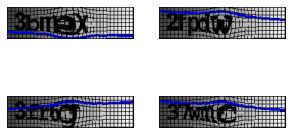

In [ ]:
sample_images = list_of_paths[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()



**Storing the true labels and all distinct characters of the dataset and length of the true labels**

In [ ]:
characters = set()

captcha_length = []

captcha_dataset = []

# Iterate over the dataset and store the images
for img_path in list_of_paths:
    label = img_path.split("/")[-1].split('_')[0]
    captcha_length.append(len(label))
    captcha_dataset.append((str(img_path), label))
    for ch in label:
        characters.add(ch)
       
# Convert the dataset info into a dataframe
captcha_dataset = pd.DataFrame(captcha_dataset, columns=["img_path", "label"], index=None)

# Shuffle the dataset
captcha_dataset = captcha_dataset.sample(frac=1.).reset_index(drop=True)


print("Number of unqiue charcaters in the whole dataset: ", len(characters))
print("Maximum length of any captcha: ", max(Counter(captcha_length).keys()))
print("Characters present: ", characters)
print("Total number of samples in the dataset: ", len(captcha_dataset))
captcha_dataset.head()

Number of unqiue charcaters in the whole dataset:  23
Maximum length of any captcha:  5
Characters present:  {'x', 'k', 'b', 'f', 'g', 'r', '8', 'e', 'p', '6', '3', 'd', '5', 'w', '7', 'a', '4', 'y', 'c', 'n', 'h', '2', 'm'}
Total number of samples in the dataset:  250000


img_path  label
0  1/3d5nx_2935069.png  3d5nx
1  1/35kdg_2920807.png  35kdg
2  1/3dr8f_2204258.png  3dr8f
3  1/32eh4_2515736.png  32eh4
4  1/3r5rb_1791687.png  3r5rb

**splitting the dataset into train test and validation sets and Converting the images into Grey scale**

In [ ]:
from tqdm.notebook import tqdm
# Split the dataset into training and validation sets
training_data, valid_data = train_test_split(captcha_dataset, test_size=0.2, random_state=seed)
validation_data , testing_data = train_test_split(valid_data, test_size=0.2, random_state=seed)

training_data = training_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)
testing_data = testing_data.reset_index(drop=True)

print("Number of training samples: ", len(training_data))
print("Number of validation samples: ", len(validation_data))
print("Number of training samples: ", len(testing_data))


# Map text to numeric labels 
char_to_labels = {char:idx for idx, char in enumerate(characters)}

# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}



# Sanity check for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in characters:
            return False
    return True



# Store arrays in memory as it's not a muvh big dataset
def generate_arrays(df, resize=True, img_height=50, img_width=200):
   
    
    num_items = len(df)
    images = np.zeros((num_items, img_height, img_width), dtype=np.float32)
    labels = [0]*num_items
    
    for i in tqdm(range(num_items)):
        img = cv2.imread(df["img_path"][i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        if resize: 
            img = cv2.resize(img, (img_width, img_height))
        
        img = (img/255.).astype(np.float32)
        label = df["label"][i]
        
        # Add only if it is a valid captcha
        if is_valid_captcha(label):
            images[i, :, :] = img
            labels[i] = label
    
    return images, np.array(labels)



# Build training data
training_data, training_labels = generate_arrays(df=training_data)
print("Number of training images: ", training_data.shape)
print("Number of training labels: ", training_labels.shape)


# Build validation data
validation_data, validation_labels = generate_arrays(df=validation_data)
print("Number of validation images: ", validation_data.shape)
print("Number of validation labels: ", validation_labels.shape)



# Build testing data
testing_data, testing_labels = generate_arrays(df=testing_data)
print("Number of training images: ", testing_data.shape)
print("Number of testing labels: ", testing_labels.shape)

Number of training samples:  200000
Number of validation samples:  40000
Number of training samples:  10000



Number of training images:  (200000, 50, 200)
Number of training labels:  (200000,)



Number of validation images:  (40000, 50, 200)
Number of validation labels:  (40000,)



Number of training images:  (10000, 50, 200)
Number of testing labels:  (10000,)


**Data generators for train test and validation sets**

In [ ]:
class DataGenerator(keras.utils.Sequence):
    
    def __init__(self,
                 data,
                 labels,
                 char_map,
                 batch_size=1024,
                 img_width=200,
                 img_height=50,
                 downsample_factor=4,
                 max_length=5,
                 shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))    
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))
    
    def __getitem__(self, idx):
        # 1. Get the next batch indices
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        
        # 2. This isn't necessary but it can help us save some memory
        # as not all batches the last batch may not have elements
        # equal to the batch_size 
        batch_len = len(curr_batch_idx)
        
        # 3. Instantiate batch arrays
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                               dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                                (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)
        
        
        for j, idx in enumerate(curr_batch_idx):
            # 1. Get the image and transpose it
            img = self.data[idx].T
            # 2. Add extra dimenison
            img = np.expand_dims(img, axis=-1)
            # 3. Get the correpsonding label
            text = self.labels[idx]
            # 4. Include the pair only if the captcha is valid
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)
        
        batch_inputs = {
                'input_data': batch_images,
                'input_label': batch_labels,
                'input_length': input_length,
                'label_length': label_length,
                }
        return batch_inputs, np.zeros(batch_len).astype(np.float32)
        
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

In [ ]:
# Batch size for training and validation
batch_size = 1024

# Desired image dimensions
img_width=200
img_height=50 

# Factor  by which the image is going to be downsampled
# by the convolutional blocks
downsample_factor=4

# Maximum length of any captcha in the data
max_length=5

# Get a generator object for the training data
train_data_generator = DataGenerator(data=training_data,
                                     labels=training_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=True
                                    )

# Get a generator object for the validation data 
valid_data_generator = DataGenerator(data=validation_data,
                                     labels=validation_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=False
                                     )

# Get a generator object for the testing data 
test_data_generator = DataGenerator(data=testing_data,
                                     labels=testing_labels,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=img_width,
                                     img_height=img_height,
                                     downsample_factor=downsample_factor,
                                     max_length=max_length,
                                     shuffle=False
                                     )

**Defining the model**

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        
        # On test time, just return the computed loss
        return loss



def build_model():
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1),
                            name='input_data',
                            dtype='float32')
    labels = layers.Input(name='input_label', shape=[max_length], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')
    
    # First conv block
    x = layers.Conv2D(32,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv1')(input_img)
    x = layers.MaxPooling2D((2,2), name='pool1')(x)
    
    # Second conv block
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)
    
    # We have used two max pool with pool size and strides of 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing it to RNNs
    new_shape = ((img_width // 4), (img_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)
    
    # RNNs
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)
    
    # Predictions
    x = layers.Dense(len(characters)+1,
              activation='softmax', 
              name='dense2',
              kernel_initializer='he_normal')(x)
    
    # Calculate CTC
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)
    
    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')
    
    # Optimizer
   # sgd = keras.optimizers.SGD(learning_rate=0.002, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)
    
    # Compile the model and return 
    model.compile(optimizer='adam')
    return model

In [ ]:
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         input_data[0][0]                 
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [ ]:
# Add early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=5,
                                   restore_best_weights=True)

# Train the model
history = model.fit_generator(train_data_generator,
                    validation_data=valid_data_generator,
                    epochs=10,
                    callbacks=[es])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
196/196 [==============================] - 294s 1s/step - loss: 16.6496 - val_loss: 14.9109
Epoch 2/10
196/196 [==============================] - 293s 1s/step - loss: 14.6072 - val_loss: 13.6830
Epoch 3/10
196/196 [==============================] - 293s 1s/step - loss: 10.5075 - val_loss: 4.4493
Epoch 4/10
196/196 [==============================] - 292s 1s/step - loss: 2.2763 - val_loss: 0.4308
Epoch 5/10
196/196 [==============================] - 291s 1s/step - loss: 0.5599 - val_loss: 0.1159
Epoch 6/10
196/196 [==============================] - 289s 1s/step - loss: 0.2753 - val_loss: 0.0661
Epoch 7/10
196/196 [==============================] - 287s 1s/step - loss: 0.1746 - val_loss: 0.0380
Epoch 8/10
196/196 [==============================] - 289s 1s/step - loss: 0.1233 - val_loss: 0.0224
Epoch 9/10
196/196 [==============================] - 287s 1s/step - loss: 0.0978 - val_loss: 0.0220
Epoch 10/1

**Train and validation loss curve**

dict_keys(['loss', 'val_loss'])


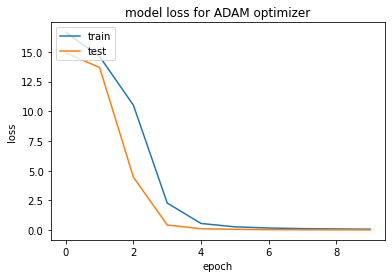

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for ADAM optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#from below plot we can see that from no of epochs greater than 10 the moel is going to overfit

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='dense2').output)
prediction_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 768)           0         
_________________________________________________________________
dense1 (Dense)               (None, 50, 64)            49216 

**Decoding using Beam search**

In [ ]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    
    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)
    
    # return final text results
    return output_text

**Checking results on testing data**

In [ ]:
#  Let's check results on some testing samples
for p, (inp_value, _) in enumerate(test_data_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']
    
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)
    
    
    orig_texts = []
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        orig_texts.append(text)
    count = 0
        
    for i in range(bs):
        #print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
        if orig_texts[i] != pred_texts:
          count = count + 1
    print(count)
    break

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
1024


**Accuracy on testing samples**

In [ ]:
print("Accuracy on testing dataset is" ,(1-count/len(testing_data))*100)

Accuracy on testing dataset is 89.75999999999999
